# ***Hydropower Consumption***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Practice dataset 1 KNN regression Hydropower_Consumption.csv", index_col=0)
df.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,312,498,555,63,565,59,637,748,542,776,751,595,71,804,895,989,1025,105,105,107
Africa,75246,80864,85181,82873,87405,89066,92241,95341,97157,99761,107427,110445,110952,117673,123727,115801,123816,130388,132735,0
Albania,4548,3519,3477,5117,5411,5319,4951,276,3759,5201,7673,4036,4725,6959,4726,5866,7136,448,448,4018
Algeria,54,69,57,265,251,555,218,226,283,342,173,378,389,99,193,145,72,56,117,152
Angola,903,1007,1132,1229,1733,2197,2638,2472,3103,3063,3666,3967,3734,4719,4991,5037,5757,7576,7576,8422


## EDA

In [3]:
df.shape

(153, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, Afghanistan to Zimbabwe
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2000    153 non-null    int64
 1   2001    153 non-null    int64
 2   2002    153 non-null    int64
 3   2003    153 non-null    int64
 4   2004    153 non-null    int64
 5   2005    153 non-null    int64
 6   2006    153 non-null    int64
 7   2007    153 non-null    int64
 8   2008    153 non-null    int64
 9   2009    153 non-null    int64
 10  2010    153 non-null    int64
 11  2011    153 non-null    int64
 12  2012    153 non-null    int64
 13  2013    153 non-null    int64
 14  2014    153 non-null    int64
 15  2015    153 non-null    int64
 16  2016    153 non-null    int64
 17  2017    153 non-null    int64
 18  2018    153 non-null    int64
 19  2019    153 non-null    int64
dtypes: int64(20)
memory usage: 25.1+ KB


In [5]:
df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.00000,153.000000,153.000000,153.000000,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,153.000000,1.530000e+02
mean,21648.078431,21611.424837,22447.915033,20558.183007,26227.039216,25577.418301,27790.013072,27683.803922,24798.647059,29686.411765,23366.03268,31506.065359,30372.294118,26398.098039,2.990825e+04,2.955286e+04,3.530078e+04,3.447106e+04,27472.803922,3.285893e+04
std,81404.562424,77239.960541,80813.611084,78158.375672,85898.531613,89497.140747,91369.382369,91901.135874,86341.399885,99582.273885,85934.03427,106212.794022,111643.918579,101922.982423,1.125689e+05,1.148546e+05,1.288437e+05,1.293356e+05,93222.406160,1.324903e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,3.000000,0.000000,0.000000,3.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,0.000000,0.000000e+00
25%,152.000000,158.000000,182.000000,164.000000,192.000000,262.000000,218.000000,276.000000,283.000000,228.000000,263.00000,128.000000,357.000000,169.000000,2.850000e+02,2.340000e+02,2.590000e+02,2.030000e+02,222.000000,2.960000e+02
50%,1758.000000,1821.000000,1668.000000,1671.000000,2333.000000,1839.000000,2049.000000,2472.000000,2153.000000,2308.000000,3049.00000,2917.000000,2912.000000,2232.000000,2.576000e+03,2.146000e+03,2.846000e+03,2.327000e+03,2045.000000,2.407000e+03
75%,7699.000000,7814.000000,7524.000000,7374.000000,9674.000000,7036.000000,9939.000000,9647.000000,9843.000000,10115.000000,10331.00000,11368.000000,12066.000000,8735.000000,1.287300e+04,9.577000e+03,1.350200e+04,1.312100e+04,12076.000000,1.228600e+04
max,662596.000000,612041.000000,632304.000000,625963.000000,626129.000000,656093.000000,668878.000000,638005.000000,667766.000000,666942.000000,711383.00000,728089.000000,862794.000000,909612.000000,1.059692e+06,1.114515e+06,1.153268e+06,1.165065e+06,707879.000000,1.269674e+06


In [6]:
df.isnull().sum()

2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
dtype: int64

## Data Splitting

In [7]:
x = df.drop('2019', axis=1)
y = df['2019']

## Data Scaling

In [8]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [10]:
para =  {
    "n_neighbors": np.arange(1,21,2), #odd values of k from 1 to 20
    "weights": ["uniform", "distance"], 
    "metric": ["eucledian", "manhattan", "minkowski"]
}

## Model

In [11]:
knn = KNeighborsRegressor()

In [12]:
knn_reg=GridSearchCV(KNeighborsRegressor(),para,cv=10)

In [13]:
knn_reg.fit(x_train,y_train)

c:\Users\pandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\pandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\pandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['eucledian', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'weights': ['uniform', 'distance']})

In [14]:
knn_reg.best_score_

np.float64(-0.470053272163824)

In [15]:
knn_reg.best_params_

{'metric': 'minkowski', 'n_neighbors': np.int64(17), 'weights': 'uniform'}

In [16]:
best_knn = KNeighborsRegressor(**knn_reg.best_params_)
best_knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=np.int64(17))

In [17]:
y_pred = best_knn.predict(x_test)

In [18]:
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score:", r2_score(y_test, y_pred))

Root Mean Square Error: 4988.63980159894
R2 score: 0.7856162482948977


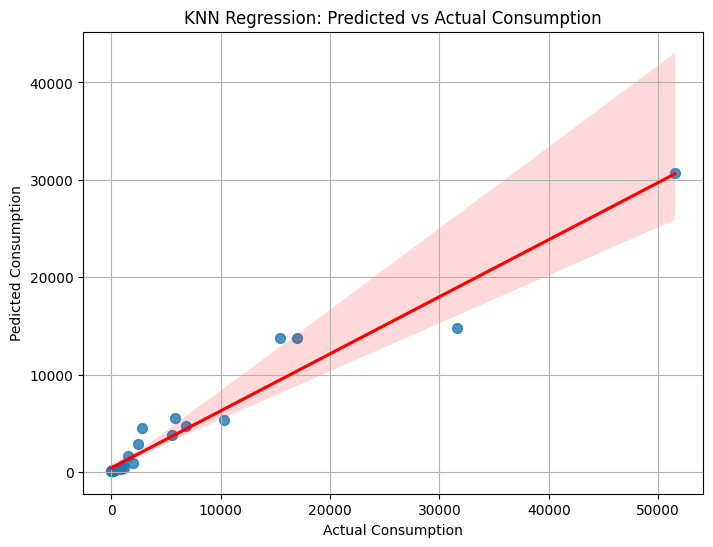

In [19]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"s":50}, line_kws={"color": "red"})
plt.xlabel('Actual Consumption')
plt.ylabel('Pedicted Consumption')
plt.title("KNN Regression: Predicted vs Actual Consumption")
plt.grid(True)
plt.show()